# (0) Codes for direct Inference

In [65]:
import sklearn
import numpy as np
import pickle

In [66]:
def forward_propagation_for_inference(X, param):
    # Written for inference purposes
    # Retrieve each parameter from the dictionary "parameters"
    W1 = param["W1"]
    b1 = param["b1"]
    W2 = param["W2"]
    b2 = param["b2"]
    Z1 = np.add(np.matmul(W1, X), b1)
    A1 = relu(Z1)
    Z2 = np.add(np.matmul(W2, A1), b2)
    A2 = softmax(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [67]:
def predict_for_inference(parameters, X):
    # Written for inference purposes    
    A2, cache = forward_propagation_for_inference(X, parameters)
    return A2 

In [68]:
# Loading the data set for inference
x_test_infer = np.load('x_test.npy', allow_pickle=True) # Transformed features of Test Data set of shape (num_of_feature i.e. 512, num_of_examples or 600)
y_test_infer = np.load('y_test.npy', allow_pickle=True)  # One hot test labels of shape (10, 600) : 10 - num of classes, 600 - num of training examples
report_aug_prev  = np.load('aug_classification_report.npy', allow_pickle=True)
report_unaug_prev = np.load('unaugmented_classification_report.npy', allow_pickle=True)

In [69]:
class_labels = np.load('class_labels.npy', allow_pickle = True)

In [70]:
a_file = open("aug_model_params.pkl", "rb")
aug_model_params = pickle.load(a_file)
a_file = open("unaug_model_params.pkl", "rb")
unaug_model_params = pickle.load(a_file)

In [71]:
pred_unaug_infer = predict_for_inference(unaug_model_params, x_test_infer)
pred_aug_infer = predict_for_inference(aug_model_params, x_test_infer )
report_unaug_new = sklearn.metrics.classification_report( np.argmax( y_test, axis = 0), np.argmax(pred_unaug_infer, axis =0), target_names = class_labels )
report_aug_new = sklearn.metrics.classification_report( np.argmax( y_test, axis = 0), np.argmax(pred_aug_infer, axis =0), target_names = class_labels )
print('The New Classification Report on Unaugmented Datasets is as follows : \n\n' + str(report_unaug_new))
print('\n\n The Earlier Classification report on Unaugmented model is displayed for comparison purpose : \n\n' + str(report_unaug_prev))
print('\n\n The New Classification Report on Augmented data sets is as follows : \n\n' + str(report_aug_new))
print('\n\n The Earlier Classification Report on Augmented model is displayed for comp[arison purpose : \n\n' + str(report_aug_prev))

The New Classification Report on Unaugmented Datasets is as follows : 

              precision    recall  f1-score   support

  Air Planes       0.63      0.74      0.68        54
 Auto-mobile       0.83      0.82      0.83        72
        bird       0.61      0.59      0.60        56
         cat       0.48      0.58      0.53        60
        deer       0.60      0.64      0.62        50
         dog       0.67      0.57      0.61        69
        frog       0.72      0.84      0.77        55
       horse       0.71      0.56      0.63        45
        ship       0.84      0.67      0.74        69
       truck       0.78      0.83      0.81        70

    accuracy                           0.69       600
   macro avg       0.69      0.68      0.68       600
weighted avg       0.70      0.69      0.69       600



 The Earlier Classification report on Unaugmented model is displayed for comparison purpose : 

              precision    recall  f1-score   support

  Air Planes    

# Downloading and Unzipping the data

In [1]:
# Getting the dataset
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz    

--2022-02-03 08:58:36--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  88.3MB/s    in 1.8s    

2022-02-03 08:58:38 (88.3 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [2]:
!tar xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


# ( 1 )
 Download the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). Hint:
Use pickle library to load the dataset. [5 marks]

In [3]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math 
np.random.seed(0)

In [4]:
def unpickle(file):
    import pickle            
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
class_names = unpickle('cifar-10-batches-py/batches.meta')
data_batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch = unpickle('cifar-10-batches-py/test_batch')

In [6]:
def display_image(img, label = None):

    '''
    Arguments :
    img - Image of shape (height, width, channel)
    label - If any
    Display the image
    '''

    img = Image.fromarray(img, 'RGB')
    img.save('my.png')
    img = mpimg.imread("my.png")
    if label != None :
      plt.title('Label ' + str(class_names[label]))
    plt.imshow(img)
    plt.show()


In [7]:
def restructure_to_image(data_batch, size = (32,32,3)):

  '''
  Restructure the unpickled data to a proper image.
  Arguments:
  data_batch - Dict containing the recently unpickeled data and label
  '''
  
  img = data_batch[b'data']
  l =  data_batch[b'labels']
  img = np.reshape(img, (-1, size[2],size[0],size[1]))
  img = img.transpose(0, 2, 3, 1)
  return (np.array(img, copy = True), np.array(l, copy = True))

In [8]:
size_of_image = (32,32,3)
class_names= class_names[b'label_names']
(data_1, label_1) = restructure_to_image(data_batch_1, size_of_image)
(data_2, label_2) = restructure_to_image(data_batch_2, size_of_image)
(data_3, label_3) = restructure_to_image(data_batch_3, size_of_image)
(data_4, label_4) = restructure_to_image(data_batch_4, size_of_image)
(data_5, label_5) = restructure_to_image(data_batch_5, size_of_image)
(data_test, label_test) = restructure_to_image(test_batch, size_of_image)

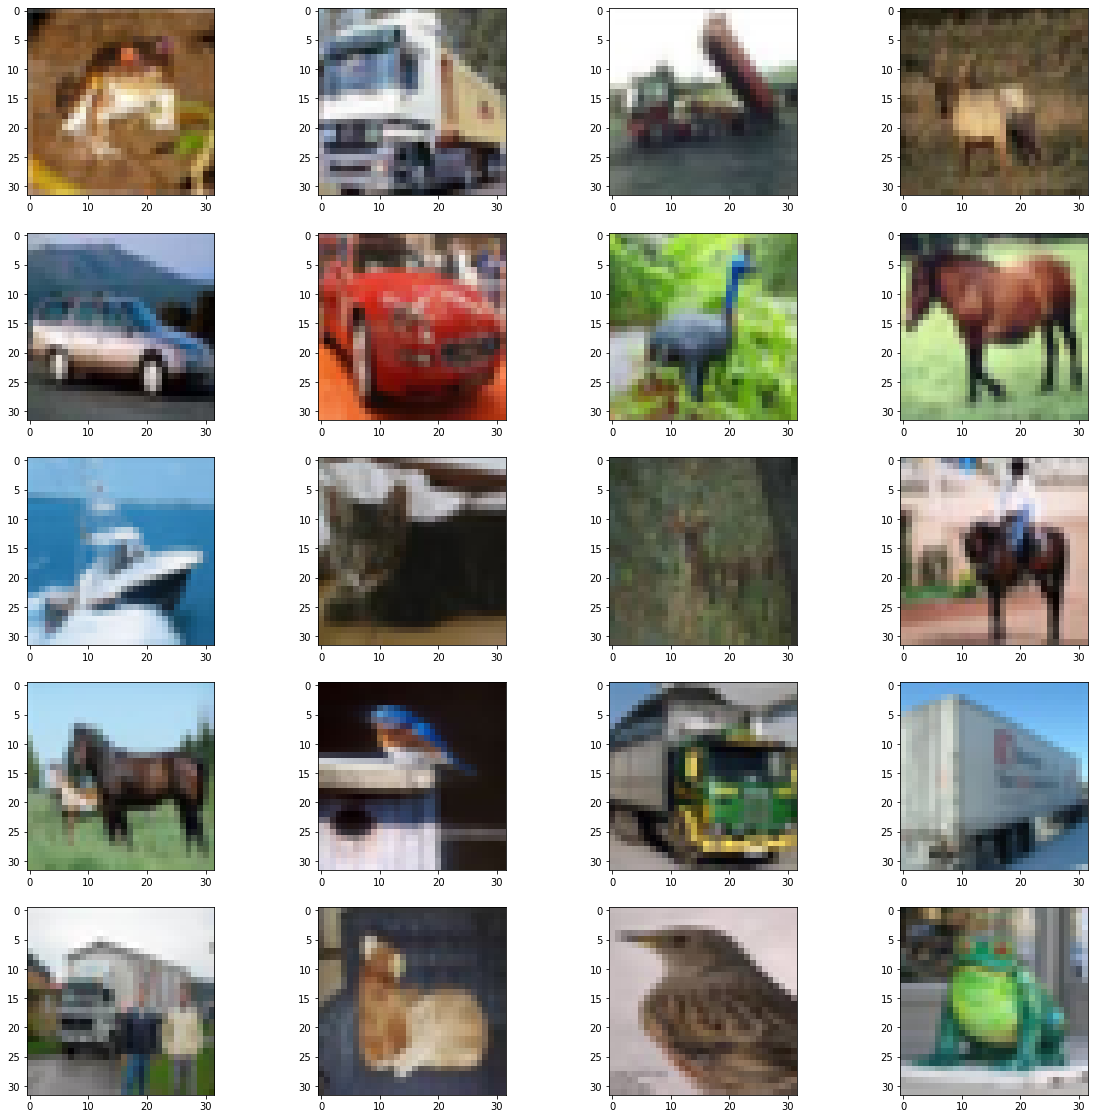

In [9]:
_, axs = plt.subplots(5, 4, figsize=(20,20))
axs = axs.flatten()
for img, ax in zip(data_1, axs):
    ax.imshow(img)
plt.show()

# (2) Transformation Methods and its checking : (5*4 = 20)



## (2 / a) Rotation
Random Rotation in the range [−180◦
, 180◦
]

In [10]:
def rotation(img, degree = None, size = size_of_image):

  '''
  This function rotates the image around its center by amount of degrees
  provided. The size of the rotated image is same as that of original image.
  '''
  if degree == None:
    degree = np.random.uniform(-180,180)
  theta = np.radians(degree)
  inverse_position_rotation_matrix = np.array([[np.cos(theta), np.sin(theta)], [ - np.sin(theta), np.cos(theta)]])
  new_img = np.uint8(np.zeros(size))
  mid = np.array((size[0] // 2, size[1] // 2) , dtype=int)

  for i in range(size[0]) : # X-axis
    for j in range(size[1]):
      new_index = np.transpose( np.array([i,j]) ) - mid
      old_index = np.round(np.dot( inverse_position_rotation_matrix , new_index)) 
      old_index = old_index + mid
      old_index = old_index.astype(int)
      #print(old_index)
      if (0<= old_index[0]) and (old_index[0]< 32) and (0<=old_index[1]) and (old_index[1]<32) :
          #print('AAA')
          new_img[i,j,:] = img[old_index[0],old_index[1], :]

  
  return new_img

(32, 32, 3)
Display Image before rotation: 


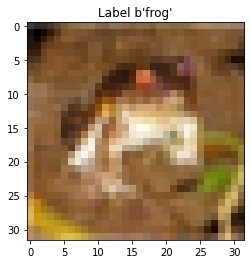

Display image after rotation: 


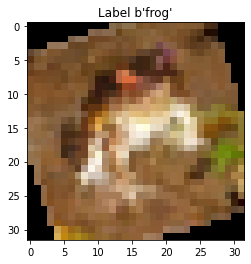

In [11]:
img = data_1[0]
print(img.shape)
l = label_1[0]
print("Display Image before rotation: ")

display_image(img, l)

rotated_img = rotation(img) # Rotate by 60 degree in counter clockwise direction

print("Display image after rotation: ")
display_image(rotated_img, l)

## (2 / b) Random Cut :    
(b) Random cutout (randomly erase a block of pixels from the image with the width and height
of the block in the range 0 to 16 pixels. The erased part (cutout) should be filled with a
single value)

In [12]:
np.random.seed(1)

In [13]:
def random_cut(img, fixed_value = 0):
  """
  Cut a random block of 16 * 16 from image and fill with the fixed value 0
  """

  new_img = np.uint8( np.full(img.shape, fixed_value) )
  shape = img.shape
  max_x = shape[0] - 16 # Maximum start  x value of the possible cut
  max_y = shape[1] - 16 # Max starting Y - value of the possible cut
  start_cut_x = np.random.randint(max_x)
  start_cut_y = np.random.randint(max_y)

  for i in range(shape[0]) :
    for j in range(shape[1]) :
      if i >= start_cut_x and i<=(start_cut_x+16) and j>= start_cut_y and j<=(start_cut_y+16):
        pass
      else:
        new_img[i,j,:] = img[i,j,:]

  return new_img


(32, 32, 3)
Display Image before rotation: 


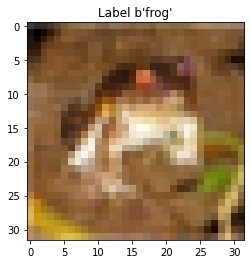

Display image after rotation: 


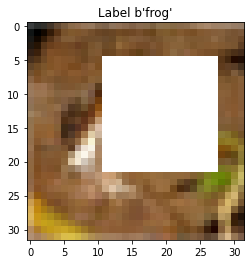

In [14]:
img = data_1[0]
print(img.shape)
l = label_1[0]
print("Display Image before rotation: ")

display_image(img, l)

rotated_img = random_cut(img, 255) # Rotate by 60 degree in counter clockwise direction

print("Display image after rotation: ")
display_image(rotated_img, l)

## (2/c) Random Crop :     
Random Crop (Add a padding of 2 pixels on all sides and randomly select a block of 32x32
pixels from the padded image) 

In [15]:
def random_crop(img) :

  pad_im = np.uint8(np.zeros( (img.shape[0]+4, img.shape[1]+4, img.shape[2]) ))

  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      pad_im[i+2,j+2,:] = img[i,j,:]

  start_x = np.random.randint(4)
  start_y = np.random.randint(4)
  new_im = np.uint8(np.zeros(img.shape))
  for i in range(new_im.shape[0]):
    for j in range(new_im.shape[1]):
      new_im[i,j,:] = pad_im[i+start_x, j+start_y, :]
  
  return (new_im, pad_im)

Display Image before random Cropping: 


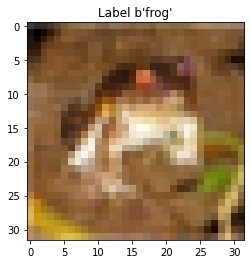

Displaying Image after padding:


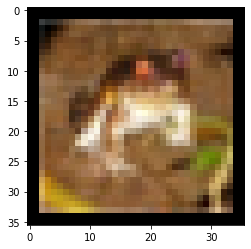

Display image after cropping: 


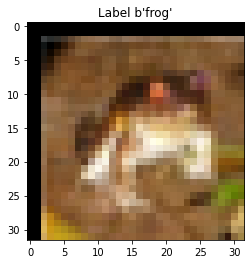

In [16]:
img = data_1[0]
#print(img.shape)
l = label_1[0]
print("Display Image before random Cropping: ")
display_image(img, l)
(cropped_img,padded_img) = random_crop(img) 
print('Displaying Image after padding:')
display_image(padded_img)
print("Display image after cropping: ")
display_image(cropped_img, l)

## (2/d) Contrast and Horizotal Flipping:
Contrast & Horizontal flipping. (First, change the contrast of the image with a factor of
α randomly selected from the range (0.5, 2.0) and then flip the image horizontally with a
probability of 0.5)

In [17]:
np.random.uniform(0.5,2)

0.5001715622260173

In [18]:
np.random.randint(1) 

0

In [19]:
def contrast_and_flipping(img):

  #Changing Contrast

  alpha = np.random.uniform(0.5, 2.0)
  new_img = np.uint8(np.zeros(img.shape))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      new_img[i,j,:] = alpha * (img[i,j,:] - 128) + 128
  
  flipped_img = np.uint8(np.zeros(img.shape))
  flip = np.random.randint(2) 

  if flip == 1:  # Do Horizontal Flipping
    if 5: #for i in range(new_img.shape[0]):
      for j in range(new_img.shape[1]) :
        flipped_img[:,j,:] = new_img[:,new_img.shape[1]-1-j, :]
  else:
    flipped_img = new_img

  
  return (flipped_img, new_img, alpha)




Display Image before Contrast and flipping: 


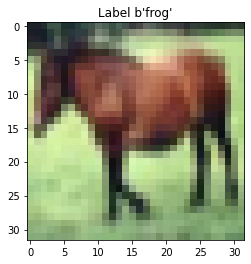

The reduced contrast image is :


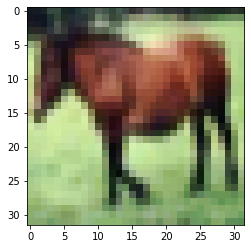

Displaying Image after Applying Contrast and Random Horizonytal Flipping with probability 0.5:


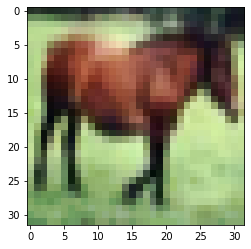

In [20]:
img = data_1[7]
#print(img.shape)
l = label_1[0]
print("Display Image before Contrast and flipping: ")
display_image(img, l)
(img, c_img, al) = contrast_and_flipping(img) 
if al<1:
  print("The reduced contrast image is :")
else :
  print("The enhanced contrast image is : ")
display_image(c_img)
print('Displaying Image after Applying Contrast and Random Horizonytal Flipping with probability 0.5:')
display_image(img)


# (3) Creating Augmented Traning Set :


. Create the augmented training set using the transformation functions implemented in the previous part. Randomly select one of the four transformations for each image in the training set
and apply it to that image. Combine the transformed images with original training set to get the
augmented training set. Note that the number of examples for the augmented training set will
be twice that of the unaugmented training set. [10 marks]

In [21]:
x_train = np.copy(data_1)
y_train = np.copy(label_1)

In [22]:
unaugmented_x_train = np.copy(data_1)
unaugmented_y_train = np.array( label_1 , copy = True)

In [23]:
def augment_training_set(x_train, y_train):
  
  new_train_set = np.uint8(np.zeros(x_train.shape))
  for i in range  (x_train.shape[0]):

    img = x_train[i]

    toss = np.random.randint(4)
    #print(toss)
    if toss == 0:
      new_img = rotation(img)
      new_train_set[i] = new_img
      #display_image(new_img)
      #print('AB')
      #display_image(new_train_set[i])
      #plt.show()
      #p#rint(i)
    elif toss == 1:
      new_img = random_cut(img)
      new_train_set[i] = new_img
      #display_image(new_img)
      ##display_image(new_train_set[i])
      #plt.show()
      #print(i)
    elif toss==2:
      (new_img, _) = random_crop(img)
      new_train_set[i] = new_img
      #display_image(new_img)
      #display_image(new_train_set[i])
      #plt.show()
      #3print(i)
    elif toss == 3:
      (new_img, _, _) = contrast_and_flipping(img)
      new_train_set[i] = new_img
      #display_image(new_img)
      #display_image(new_train_set[i])
      #plt.show()
      #print(i)
      
    #'''display_image(new_img)
    #display_image(new_train_set[i])
    #plt.show()
    #print(i)'''
    
    


  concatenated_training_set = np.concatenate((x_train, new_train_set), axis = 0)   # np.concatenate by default does deep copy
  #for i in range(concatenated_training_set.shape[0]):
  #  print('Concatenated ' + str(i))
  #  display_image(concatenated_training_set[i])
  # plt.show()
  concatenated_label = np.concatenate((y_train, y_train), axis = 0)

  return (concatenated_training_set, concatenated_label)



In [24]:
(augmented_x_train, augmented_y_train) = augment_training_set(x_train, y_train)
print('The Shape of the original training set' + str(x_train.shape))
print('The shape of the augmented traing set ' + str(augmented_x_train.shape) +' and its corresponding label shape  ' + str(augmented_y_train.shape))

The Shape of the original training set(10000, 32, 32, 3)
The shape of the augmented traing set (20000, 32, 32, 3) and its corresponding label shape  (20000,)


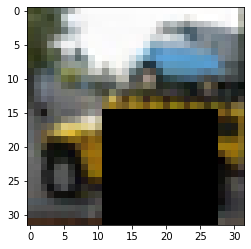

In [25]:
display_image(augmented_x_train[10000+9997])

# (4) Use of feature_extractor.py for feature extraction 

### Feature_extractor.py

In [26]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision.models import resnet18

def get_name_to_module(model):
    name_to_module = {}
    for m in model.named_modules():
        name_to_module[m[0]] = m[1]
    return name_to_module


def get_activation(all_outputs, name):
    def hook(model, input, output):
        all_outputs[name] = output.detach()

    return hook


def add_hooks(model, outputs, output_layer_names):
    """
    :param model:
    :param outputs: Outputs from layers specified in `output_layer_names` will be stored in `output` variable
    :param output_layer_names:
    :return:
    """
    name_to_module = get_name_to_module(model)
    for output_layer_name in output_layer_names:
        name_to_module[output_layer_name].register_forward_hook(get_activation(outputs, output_layer_name))


class ModelWrapper(nn.Module):
    def __init__(self, model, output_layer_names, return_single=True):
        super(ModelWrapper, self).__init__()
        
        self.model = model
        self.output_layer_names = output_layer_names
        self.outputs = {}
        self.return_single = return_single
        add_hooks(self.model, self.outputs, self.output_layer_names)

    def forward(self, images):
        self.model(images)
        output_vals = [self.outputs[output_layer_name] for output_layer_name in self.output_layer_names]
        if self.return_single:
            return output_vals[0]
        else:
            return output_vals

class BBResNet18(object):
    def __init__(self):
        self.model = resnet18(pretrained=True)
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.model.eval()

        self.model = ModelWrapper(self.model, ['avgpool'], True)

        self.model.eval()
        self.model.to(self.device)

    def feature_extraction(self, x ):
        '''
            param:
                x: numpy ndarray of shape: [None, 3, 224, 224] and dtype: np.float32
            
            return:
                numpy ndarray (feature vector) of shape: [None, 512] and dtype: np.float32
        '''
        
        x = torch.from_numpy(x).to(self.device)
        
        with torch.no_grad():
            out = self.model(x).cpu().detach()
            out = out.view(out.size(0), -1)
            out = out.numpy()

        return out

### Doing feature extraction

In [27]:
#Cannot run due to run time crash
# Resizing by CV2
#x_train_resized = np.uint8(np.zeros((augmented_x_train.shape[0],224,224,3))) 
#for i in range(augmented_x_train.shape[0]) :
# x_train_resized[i] = cv2.resize(augmented_x_train[0], dsize=(224,224))

In [28]:
index = np.random.permutation(augmented_x_train.shape[0])
random_x_train = augmented_x_train[index[0:1000]]
y_train = np.copy( augmented_y_train[index[0:1000] ] )
index = np.random.permutation(data_test.shape[0])
random_x_test = np.copy( data_test[index[0:600]] )
y_test = np.array( label_test, copy = True )[index[0:600]]
resized_x_train = np.uint8( np.zeros( ( random_x_train.shape[0], 224, 224, 3 ) ) )
resized_x_test = np.uint8( np.zeros( ( random_x_test.shape[0], 224, 224, 3 ) ))
for i in range(random_x_train.shape[0]) :
  resized_x_train[i] = cv2.resize( random_x_train[i], dsize=( 224,224 ) )
for i in range(random_x_test.shape[0]):
  resized_x_test[i] = cv2.resize( random_x_test[i], dsize = ( 224,224 ) )
resized_x_train = np.transpose(resized_x_train, axes = (0, 3,1,2))
resized_x_test = np.transpose( resized_x_test, axes = ( 0, 3, 1, 2 ) )

In [29]:
index = np.random.permutation(unaugmented_x_train.shape[0])
unaugmented_x_train = unaugmented_x_train[index[0:1000]]
unaugmented_y_train = unaugmented_y_train[index[0:1000]]
resized_unaugmented_x_train = np.uint8( np.zeros( ( unaugmented_x_train.shape[0], 224, 224, 3 ) ) )
for i in range( unaugmented_x_train.shape[0] ):
  resized_unaugmented_x_train[i] = cv2.resize( unaugmented_x_train[i], dsize = ( 224, 224 ) )
resized_unaugmented_x_train = np.transpose( resized_unaugmented_x_train, axes = ( 0,3,1,2 ) )

In [30]:
featureExtractorObj = BBResNet18()
#transformed_x_train_dict = [] #np.float32( np.zeros( ( resized_x_train.shape[0], 512 ) ) )
#for i in range( np.int(resized_x_train.shape[0] / 100) ) :
transformed_x_train_slice = featureExtractorObj.feature_extraction( resized_x_train.astype( np.float32 ) / 255.0)
#  transformed_x_train_dict.append(transformed_x_train_slice)
#transformed_x_train = np.array(transformed_x_train_dict)
transformed_x_test = featureExtractorObj.feature_extraction( resized_x_test.astype( np.float32 ) / 255.0)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [31]:
transformed_x_train = transformed_x_train_slice

In [32]:
#transformed_x_train = np.vstack(transformed_x_train)

In [33]:
transformed_unaugmented_x_train = featureExtractorObj.feature_extraction( resized_unaugmented_x_train.astype( np.float32 ) / 255.0 )

In [34]:
transformed_x_train.shape

(1000, 512)

In [35]:
valuable_augmented_x_train = np.copy(transformed_x_train)
val_unaugmented_x_train = np.copy(transformed_unaugmented_x_train)
valuable_x_test = np.copy(transformed_x_test)

In [36]:
def one_hot_encoder(y, num_classes = 10):

  y = np.array(y, dtype = np.int8 )
  z = np.zeros( ( num_classes, y.shape[0] ), dtype = np.float32 )
  cols = np.arange( y.shape[0] )
  print(z.shape)
  print(cols.shape)
  z[y, cols] = 1.0

  return z


In [37]:
augmented_x_train = np.transpose(transformed_x_train) #Shape : (512, num_examples)
augmented_y_train = one_hot_encoder( y_train )
x_test = np.transpose( transformed_x_test )
y_test = one_hot_encoder(y_test)
unaugmented_x_train = np.transpose( transformed_unaugmented_x_train )
unaugmented_y_train = one_hot_encoder( unaugmented_y_train )

(10, 1000)
(1000,)
(10, 600)
(600,)
(10, 1000)
(1000,)


# 5) Implementing the Forward prop  

. Implement a multi-layer perceptron (MLP) for classification of CIFAR-10 images. Use only a
single hidden layer with 64 neurons and ReLu activation function. The input to this MLP will
be the 1-dimensional vectors generated in the previous step. [10 Marks]

In [38]:
def xavier_initialization_np(fan_out, fan_in):

  scale = 1/max(1., (fan_in + fan_out)/2.)
  limit = math.sqrt(3.0 * scale)
  weights = np.random.uniform(-limit, limit, size=(fan_out, fan_in))
  return weights

In [39]:
def initialize_parameters(n_x = 512, n_h = 64, n_y = 10):
    """
    Argument:
    n_x -- size of the input layer i.e. 512
    n_h -- size of the hidden layer i.e. 64 neurons
    n_y -- size of the output layer i.e. the number of output classes
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    W1 =  xavier_initialization_np(n_h, n_x)  #np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = xavier_initialization_np(n_y, n_h)    #np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [40]:
def relu(x):

  return np.copy(np.maximum( 0, x ))

In [41]:
def relu_grad(x):
  z = np.ones(x.shape, dtype = np.float32)
  z[x<=0] = 0
  return z #np.array(( x>0 ), dtype = np.float32)

In [42]:
def softmax (z):

  exp = np.exp(z)
  sum = np.sum(exp, axis = 0, keepdims = True) #Along the rows
  softmax_op = exp / sum
  return softmax_op

In [43]:
def forward_propagation(X, param):
    
    
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing parameters 
            W1 -- weight matrix of shape (n_h, n_x)
            b1 -- bias vector of shape (n_h, 1)
            W2 -- weight matrix of shape (n_y, n_h)
            b2 -- bias vector of shape (n_y, 1)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = param["W1"]   # Shape : (512, 64)
    b1 = param["b1"]   # Shape : (64, 1)
    W2 = param["W2"]   # Shape : (64, 10)
    b2 = param["b2"]   # Shape : (10, 1)

    Z1 = np.add(np.matmul(W1, X), b1)   # Shape (64, num_examples)
    A1 = relu(Z1)                       # Shape : (64, num_examples)
    Z2 = np.add(np.matmul(W2, A1), b2)  # Shape : (10, num_examples)
    A2 = softmax(Z2)                    # Shape : (10, num_examples)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


In [44]:
def compute_cost(A2, Y, parameters):
    
    
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The softmax output of the second activation, of shape (num_classes, number of examples)
    Y -- "true" labels vector of shape (num_classes, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example

    cross_entropy_loss = np.multiply(Y, np.log(A2))   # Elementwise Multiplication
    '''print(cross_entropy_loss.shape)
    print(cross_entropy_loss)
    print(A2, Y)
    print(Y)'''
    cost = (-1.0/m) * np.sum(cross_entropy_loss)
    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

# (6) Implementation of Back Propagation

### Back Prop

In [45]:
def backward_propagation(parameters, cache, X, Y):
    """
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (512, number of examples)
    Y -- "true" labels vector of shape (10, number of examples), a one-hot vector of class labels
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    #print("DZ@ Shape" + str(dZ2.shape))
    dW2 = (1.0/m) * np.matmul(dZ2, np.transpose(A1)) # Shape : ( num_output_classes or 10, num_neurons_in_the_second_neuron or 64 )
    #print('DW2.shape ' + str(dW2.shape))
    db2 = (1.0/m) * np.sum(dZ2, axis=1, keepdims=True) # Shape : (10, 1)
    dA1 = np.matmul(np.transpose(W2), dZ2)  # Shape : (64, nu_examples)
    #print('DA1.shape ' + str(dA1.shape))
    dZ1 = dA1 * relu_grad(Z1)  # Shape : (64, num_examples)
    #print('DZ1.shape ' + str(dZ1.shape))
    dW1 = (1.0/m) * np.matmul(dZ1, np.transpose(X))
    #print('dW1.shape '+str(dW1.shape))
    db1 = (1.0/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### Update Parameters

In [46]:
def update_parameters(parameters, grads, learning_rate = 0.1):
    
    
    """

    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [47]:
def calculate_accuracy(pred_score, label):
  
  
  return np.mean( np.argmax( pred_score, axis = 0 ) == np.argmax( label, axis = 0 ) )

### The whole neural net model

In [48]:
def nn_model(X, Y, n_h = 64, num_iterations = 10000, learning_rate=0.01, print_cost=True):
    
    
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    indices = np.random.permutation(X.shape[1])
    t_split = int((9/10) * X.shape[1] )
    training_idx, test_idx = indices[:t_split], indices[t_split:]
    x_train, x_test = X[:, training_idx], X[ : , test_idx ]
    y_train, y_test = Y[:, training_idx], Y[ : , test_idx ]

    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    costs_train = []
    train_acc = []
    dev_acc = []
    costs_dev = []
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(x_train, parameters)
        #print('*****************************************************************')
        #print( 'PARAMS ' + str( parameters ) )
        #print('-------------------------------------------------------------')
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, y_train, parameters)
        #print('Cost ' + str(cost))
        costs_train.append(cost)
        train_accu = calculate_accuracy( A2, y_train )
        train_acc.append(train_accu)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, x_train, y_train)
        #print('Grads ' + str( grads ) )
        #print('-------------------------------------------------------------')
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        #print( 'PARAMS ' + str( parameters ) )
        
        # Devolopment Set
        A2_dev, cache_dev = forward_propagation(x_test, parameters)
        dev_accu = calculate_accuracy(A2_dev, y_test )
        dev_acc.append(dev_accu)
        cost_dev = compute_cost(A2_dev, y_test, parameters)
        costs_dev.append(cost_dev)

        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print (" Training Cost after iteration %i: %f and Dev cost : %f." %(i, cost, cost_dev))
            #print("w2 " +str(parameters["W2"]))
        
    
    
    
    # cache all about model
    
    trained_model = {
            "layer_sizes": (n_x, n_h, n_y),
            "learning_rate": learning_rate,
            "training_costs": costs_train,
            "dev_costs": costs_dev,
            "train_acc": train_acc,
            "dev_acc": dev_acc,
            "parameters": parameters
    }

    return trained_model

In [49]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    A2, cache = forward_propagation(X, parameters)
    #predictions = np.argmax( A2, axis = 0 )
    
    return A2 #predictions

### Plot graphs of metrics over iteration

In [50]:
def plot_graphs(unaug, aug):

  # Plots the graph

  fig, ax = plt.subplots(2,2, figsize = (32,16))
  
  ax[0,0].plot(np.arange( len(unaug['training_costs'])), unaug['training_costs'], color = 'red', label = 'Training' )
  ax[0,0].plot(np.arange( len(unaug['dev_costs'])), unaug['dev_costs'], color = 'blue', label = 'Dev Set' )
  ax[0,0].set_ylabel('Costs')
  ax[0,0].set_xlabel('Iterations')
  ax[0,0].set_title("Cost Vs Iteration of the Model trained on Unaugmented Data Set")

  ax[0,1].plot(np.arange( len(aug['training_costs'])), aug['training_costs'], color = 'red', label = 'Training' )
  ax[0,1].plot(np.arange( len(aug['dev_costs'])), aug['dev_costs'], color = 'blue', label = 'Dev Set' )
  ax[0,1].set_ylabel('Costs')
  ax[0,1].set_xlabel('Iterations')
  ax[0,1].set_title("Cost Vs Iteration of the Model trained on Augmented Data Set")

  ax[1,0].plot(np.arange( len(unaug['train_acc'])), unaug['train_acc'], color = 'red', label = 'Training' )
  ax[1,0].plot(np.arange( len(unaug['dev_acc'])), unaug['dev_acc'], color = 'blue', label = 'Dev Set' )
  ax[1,0].set_ylabel('Accuracy')
  ax[1,0].set_xlabel('Iterations')
  ax[1,0].set_title("Accuracy Vs Iteration of the Model trained on Unaugmented Data Set")

  ax[1,1].plot(np.arange( len(aug['train_acc'])), aug['train_acc'], color = 'red', label = 'Training' )
  ax[1,1].plot(np.arange( len(aug['dev_acc'])), aug['dev_acc'], color = 'blue', label = 'Dev Set' )
  ax[1,1].set_ylabel('Accuracy')
  ax[1,1].set_xlabel('Iterations')
  ax[1,1].set_title("Accuracy Vs Iteration of the Model trained on Augmented Data Set")

  plt.show()

### (6 / a and b) : Running the back prop on both the augmented and unaugmented data set and plotting the graph of accuracy and categorical cross entropy metric

 Training Cost after iteration 0: 3.206658 and Dev cost : 3.339386.
 Training Cost after iteration 100: 0.877196 and Dev cost : 1.056756.
 Training Cost after iteration 200: 0.647229 and Dev cost : 0.930699.
 Training Cost after iteration 300: 0.369839 and Dev cost : 1.006669.
 Training Cost after iteration 400: 0.293774 and Dev cost : 1.081043.
 Training Cost after iteration 500: 0.188291 and Dev cost : 1.048293.
 Training Cost after iteration 600: 0.140408 and Dev cost : 1.144543.
 Training Cost after iteration 700: 0.088790 and Dev cost : 1.173287.
 Training Cost after iteration 800: 0.066683 and Dev cost : 1.214995.
 Training Cost after iteration 900: 0.051684 and Dev cost : 1.261579.
 Training Cost after iteration 1000: 0.041500 and Dev cost : 1.300892.
 Training Cost after iteration 1100: 0.034279 and Dev cost : 1.334682.
 Training Cost after iteration 1200: 0.028910 and Dev cost : 1.364654.
 Training Cost after iteration 1300: 0.024832 and Dev cost : 1.392430.
 Training Cost aft

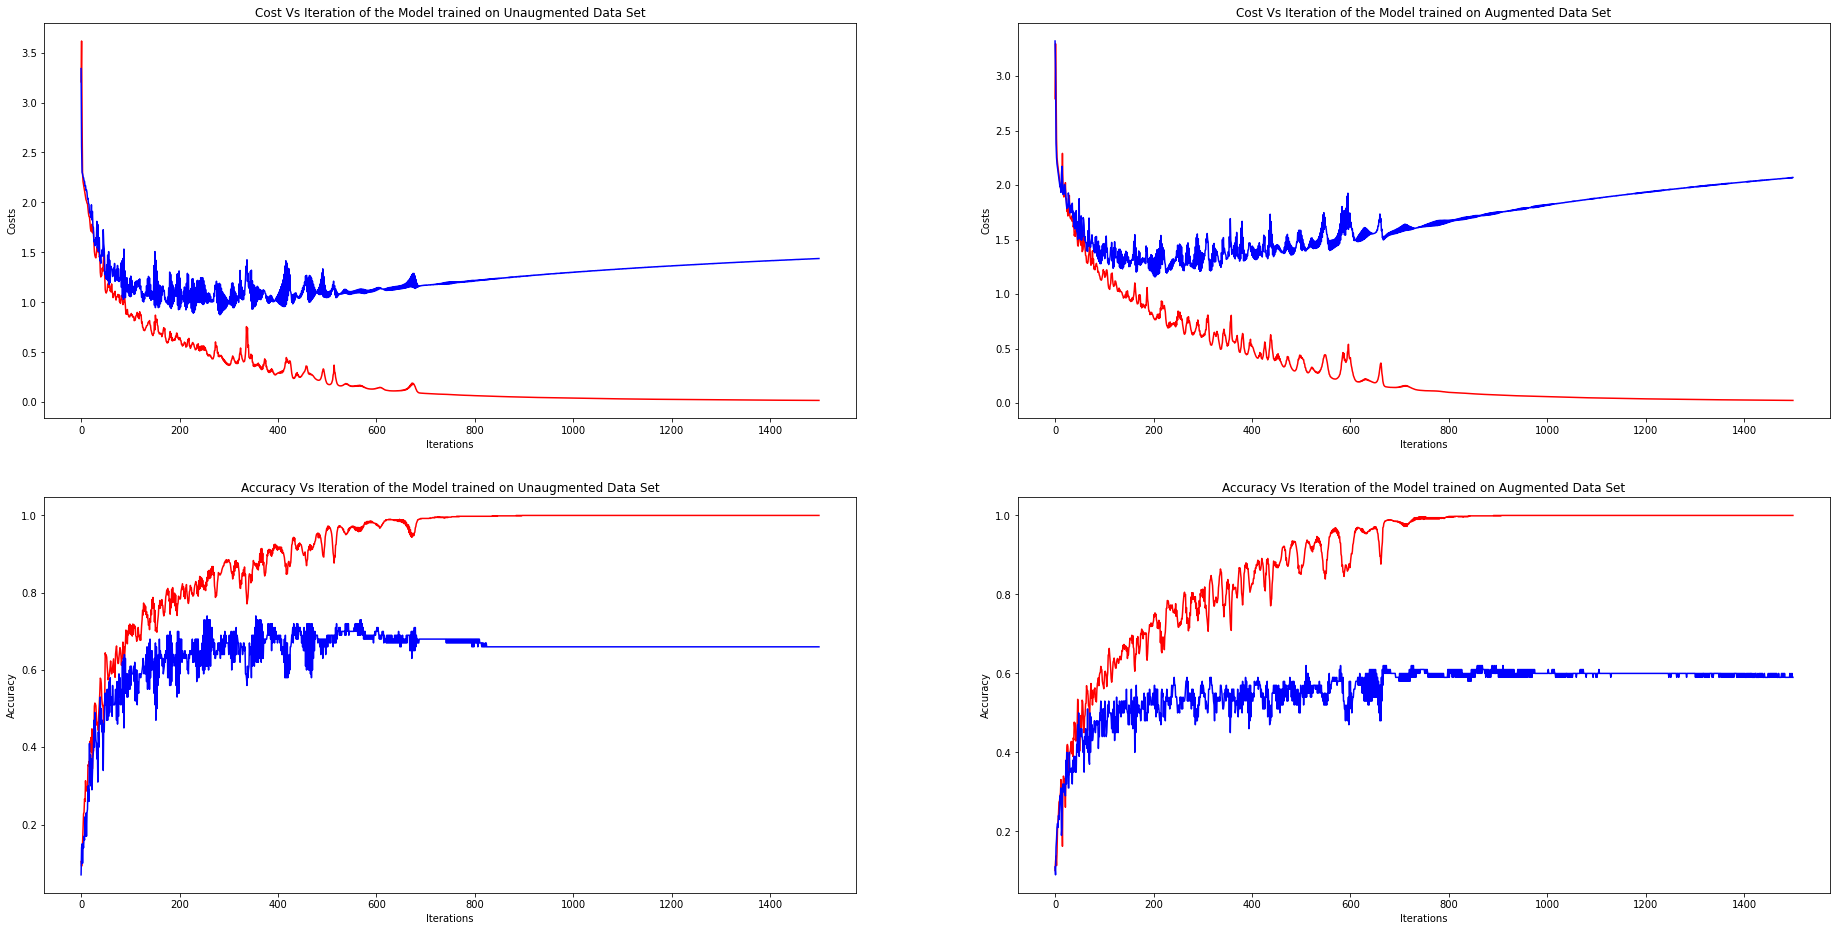

In [51]:
unaugmented_model = nn_model(unaugmented_x_train, unaugmented_y_train, num_iterations = 1500, learning_rate = 0.1)
augmented_model = nn_model(augmented_x_train, augmented_y_train, num_iterations = 1500, learning_rate = 0.1 )
plot_graphs(unaugmented_model, augmented_model)

# (7) Evaluate the performance of the both trained MLP models on the original (unaugmented) test set


Doing the evaluation i.e. running both the models on test set

In [52]:
pred_x_test_on_aug_model = predict(augmented_model['parameters'], x_test)
pred_x_test_on_unaug_model = predict(unaugmented_model['parameters'], x_test)

Define metrics

In [53]:
# Here, we are taking help from sklearn to build the accuracy metrics
# we already have write down our own accuracy function
import sklearn 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Evaluating the matrices on the Test Set

In [54]:
accu_aug = calculate_accuracy(pred_x_test_on_aug_model, y_test)
accu_unaug = calculate_accuracy(pred_x_test_on_unaug_model, y_test )
print('The Accuracy on the Augmented Data set is %f and on unaugmented data set is %f.' %(accu_aug, accu_unaug))

The Accuracy on the Augmented Data set is 0.616667 and on unaugmented data set is 0.688333.


We can see from above that the test accuracy for unaugmented data set is slightly higher. It is due to the fact that the unaugmented data set was slightly eadsirer to predict.

In [55]:
class_labels = [ 'Air Planes', 'Auto-mobile','bird','cat','deer','dog','frog','horse','ship','truck']

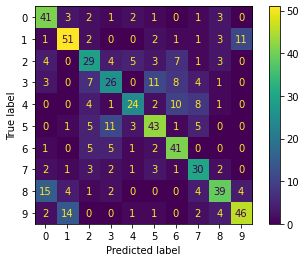

Confusion matrix Augmented model


In [56]:
# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis = 0), np.argmax( pred_x_test_on_aug_model, axis = 0) )
cm_display = ConfusionMatrixDisplay(cm ).plot()
plt.show()
print("Confusion matrix Augmented model")

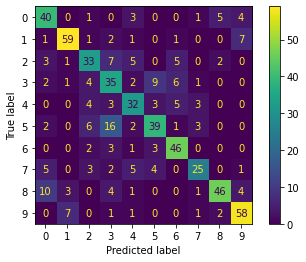

Confusion matrix on Unaugmented model


In [57]:
# Confusion Matrix
cm = confusion_matrix(np.argmax(y_test, axis = 0), np.argmax( pred_x_test_on_unaug_model, axis = 0) )
cm_display = ConfusionMatrixDisplay(cm ).plot()
plt.show()
print("Confusion matrix on Unaugmented model")

In [58]:
r_aug = classification_report( np.argmax(y_test, axis = 0), np.argmax( pred_x_test_on_aug_model, axis = 0), target_names = class_labels)
r_unaug = classification_report( np.argmax(y_test, axis = 0), np.argmax( pred_x_test_on_unaug_model, axis = 0), target_names = class_labels)
print('The classification report on Augmeneted Model is as follows on Unaugmeneted Original Test Set : \n')
print(' ')
print(r_aug)
print('\n\n\n')
print('The classification report on Unaugmeneted Model is as follows on Unaugmeneted Original Test Set : \n\n')
print(r_unaug)

The classification report on Augmeneted Model is as follows on Unaugmeneted Original Test Set : 

 
              precision    recall  f1-score   support

  Air Planes       0.59      0.76      0.67        54
 Auto-mobile       0.69      0.71      0.70        72
        bird       0.50      0.52      0.51        56
         cat       0.50      0.43      0.46        60
        deer       0.65      0.48      0.55        50
         dog       0.63      0.62      0.63        69
        frog       0.59      0.75      0.66        55
       horse       0.54      0.67      0.59        45
        ship       0.70      0.57      0.62        69
       truck       0.75      0.66      0.70        70

    accuracy                           0.62       600
   macro avg       0.61      0.62      0.61       600
weighted avg       0.62      0.62      0.61       600





The classification report on Unaugmeneted Model is as follows on Unaugmeneted Original Test Set : 


              precision    recall  f

From the above report we can see all the evaluation metric is slightly higher on Unaugmeneted Data set due to the simplicity of the Unaugmeneted Dataset. Due to augmentation, we have reduced the data set quality and have make the classification job a slightly hard.

#### SToring all the model parameters for evaluation

In [59]:
# Storing all the forward weights along with the extracted features from feature extractor
#np.save('augmented_x_train.npy', augmented_x_train)
#np.save('augmented_y_train.npy', augmented_y_train)
#np.save('unaugmented_x_train.npy', unaugmented_x_train )
#np.save('unaugmented_y_train.npy', unaugmented_y_train)
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)
#np.save('aug_model_params.npy', augmented_model['parameters'] )
#np.save('unaug_modle_params.npy', unaugmented_model['parameters'])
np.save('aug_classification_report.npy', np.array(r_aug))
np.save('unaugmented_classification_report.npy', np.array(r_unaug))


In [60]:
np.save('class_labels.npy', class_labels)

In [63]:
a_file = open("aug_model_params.pkl", "wb")
pickle.dump(augmented_model['parameters'], a_file)
a_file.close()

In [64]:
a_file = open("unaug_model_params.pkl", "wb")
pickle.dump(unaugmented_model['parameters'], a_file)
a_file.close()